In [5]:
from qutip import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.integrate as sci
import scipy.special as scs
from matplotlib.cm import get_cmap,ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm



N=100




n_oscillators=1
delta=0.2
etaf=0.105
n=2
theta=np.pi/2
m=4
tmax=250
samples=10000
tau=100

norm_imag = TwoSlopeNorm(vmin=-0.3, vcenter=0, vmax=0.3)

a=destroy(N)
ad=create(N)


f=lambda t:etaf*np.tanh(t/tau)




rho0=tensor(basis(N,0),basis(N,0))


tlist=tmax*np.linspace(0.0,1,samples)

H0=delta*ad*a#+delta*ad2*a2-xi*(ad1*a2+a1*ad2)
Ht=(a**n-ad**n)*1.0j

In [6]:
E=np.zeros((5,samples))

for i in range(samples):
    E[:,i]=(H0+f(tlist[i])*Ht).eigenenergies()[0:5]

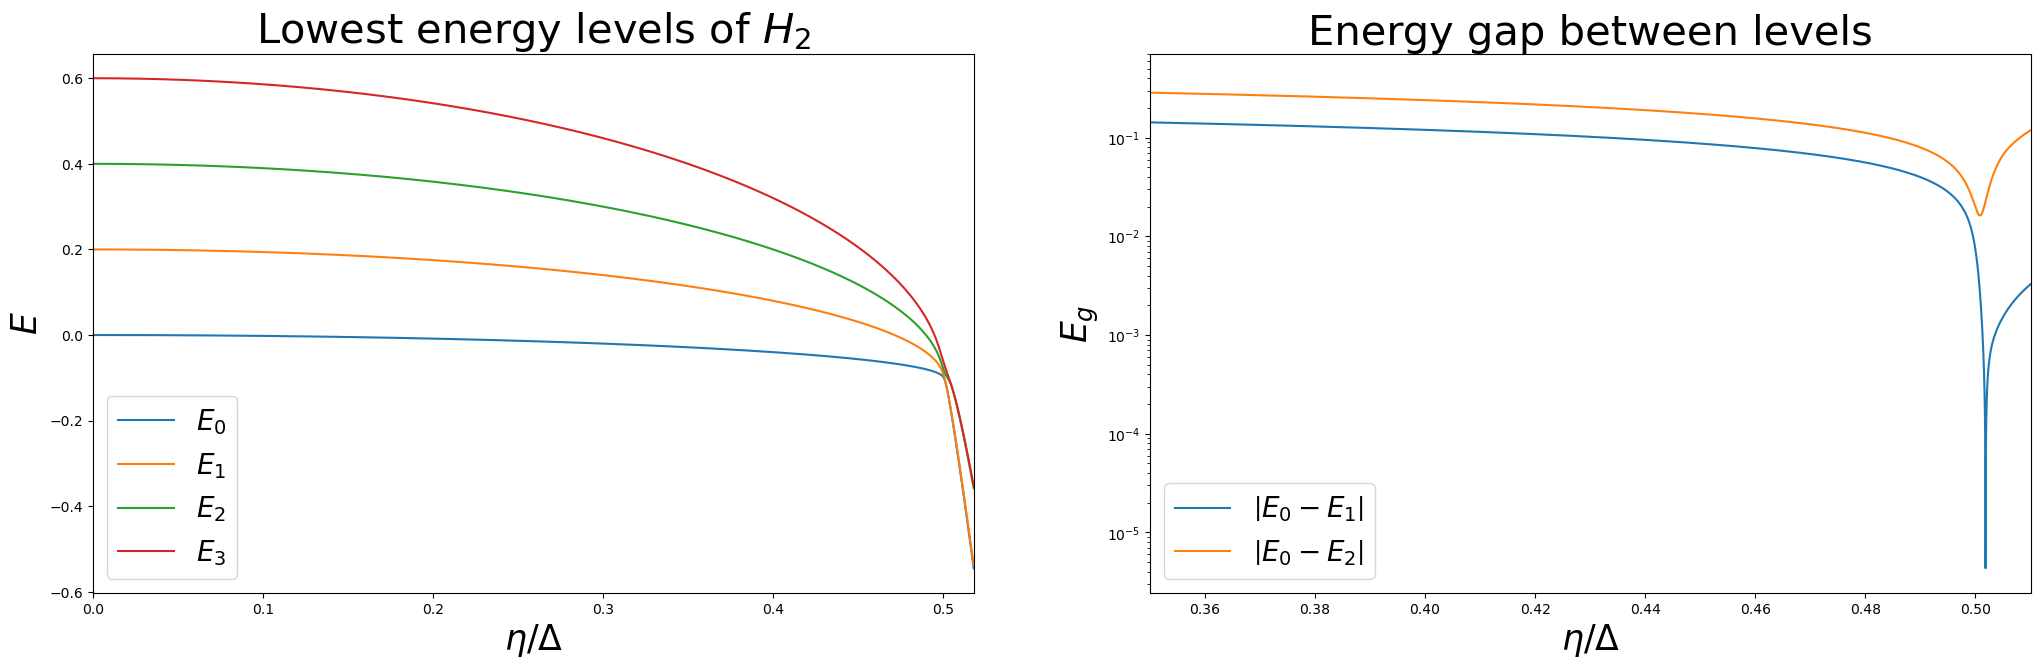

In [7]:
fig,ax=plt.subplots(1,2,figsize=(25,7))

ax[0].set_title(r"Lowest energy levels of $H_2$",fontsize=30)

ax[0].plot(f(tlist)/delta,E[0,:],label=r"$E_0$")
ax[0].plot(f(tlist)/delta,E[1,:],label=r"$E_1$")
ax[0].plot(f(tlist)/delta,E[2,:],label=r"$E_2$")
ax[0].plot(f(tlist)/delta,E[3,:],label=r"$E_3$")
ax[0].set_xlabel(r"$\eta/\Delta$",fontsize=25)
ax[0].set_ylabel(r"$E$",fontsize=25)

ax[0].set_xlim(f(0),f(tlist[-1])/delta)

ax[0].legend(loc="lower left",fontsize=20)



ax[1].set_title(r"Energy gap between levels",fontsize=30)

ax[1].plot(f(tlist)/delta,np.abs(E[1,:]-E[0,:]),label=r"$\left |E_0-E_1\right|$")
ax[1].plot(f(tlist)/delta,np.abs(E[2,:]-E[0,:]),label=r"$\left |E_0-E_2\right|$")
ax[1].set_xlim(f(0),0.105)
ax[1].set_xlabel(r"$\eta/\Delta$",fontsize=25)
ax[1].set_ylabel(r"$E_g$",fontsize=25)
ax[1].set_yscale("log")
ax[1].legend(loc="lower left",fontsize=20)
ax[1].set_xlim(0.07/delta,0.102/delta)


plt.savefig("niveles_de_energia_un_oscilador.png",format="png",bbox_inches="tight")

In [8]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.special as scs
import scipy.integrate as sci
import sys
from pympler import asizeof
from concurrent import futures
import tracemalloc
import time as t
import multiprocessing
from multiprocessing import shared_memory


print("Núcleos disponibles:", multiprocessing.cpu_count())

rng=np.random

N=30

n_oscillators=2
delta=0.4
etaf=0.2
n=2
theta=np.pi/2
m=4
tmax=600
samples=5000
tau=100
xi=0.05
gammam=0.01

J=np.zeros((n_oscillators,n_oscillators))

for i in range(n_oscillators):
    for j in range(i,n_oscillators):
        if(rng.uniform(0.0,1.0)<0.5):
            J[i,j]=1.0#+0.1*(rng.uniform(0.0,1.0)*2-1.0)
        else:
            J[i,j]=-1.0#-0.1*(rng.uniform(0.0,1.0)*2-1.0)


J=np.ones((n_oscillators,n_oscillators))

J=(J+J.T)/2

for i in range(n_oscillators):
    J[i,i]=0


a=[]
ad=[]


for i in range(n_oscillators):
    if(i==0):
        a.append(Qobj(tensor(destroy(N),qeye(N**(n_oscillators-i-1))).data_as("dia_matrix")))
        ad.append(Qobj(tensor(create(N),qeye(N**(n_oscillators-i-1))).data_as("dia_matrix")))
    elif(i==n_oscillators-1):
        a.append(Qobj(tensor(qeye(N**i),destroy(N)).data_as("dia_matrix")))
        ad.append(Qobj(tensor(qeye(N**i),create(N)).data_as("dia_matrix")))
    else:        
        a.append(Qobj(tensor(qeye(N**i),destroy(N),qeye(N**(n_oscillators-i-1))).data_as("dia_matrix")))
        ad.append(Qobj(tensor(qeye(N**i),create(N),qeye(N**(n_oscillators-i-1))).data_as("dia_matrix")))


psi0=basis(N**n_oscillators,0)

tlist=tmax*np.linspace(0.0,1,samples)

H0=qzero(N**n_oscillators)
Ht=qzero(N**n_oscillators)
f=lambda t:etaf*np.tanh(t/tau)

jump=[]

for i in range(n_oscillators):
    H0+=delta*ad[i]*a[i]
    
    Ht+=(a[i]**n*np.exp(theta*n*1.0j)-ad[i]**n*np.exp(-theta*n*1.0j))*1.0j
    for j in range(n_oscillators):
        if(i!=j):
            H0-=xi*J[i,j]*(ad[i]*a[j])

Núcleos disponibles: 20


In [9]:
E=np.zeros((5,samples))

for i in range(samples):
    E[:,i]=(H0+f(tlist[i])*Ht).eigenenergies()[0:5]

In [10]:
E[0,-10:]

array([-1.74914552, -1.74914596, -1.74914641, -1.74914685, -1.74914729,
       -1.74914773, -1.74914817, -1.74914861, -1.74914905, -1.74914949])

In [11]:
E[1,-10:]

array([-1.74896118, -1.74896163, -1.74896207, -1.74896252, -1.74896296,
       -1.7489634 , -1.74896384, -1.74896428, -1.74896471, -1.74896515])

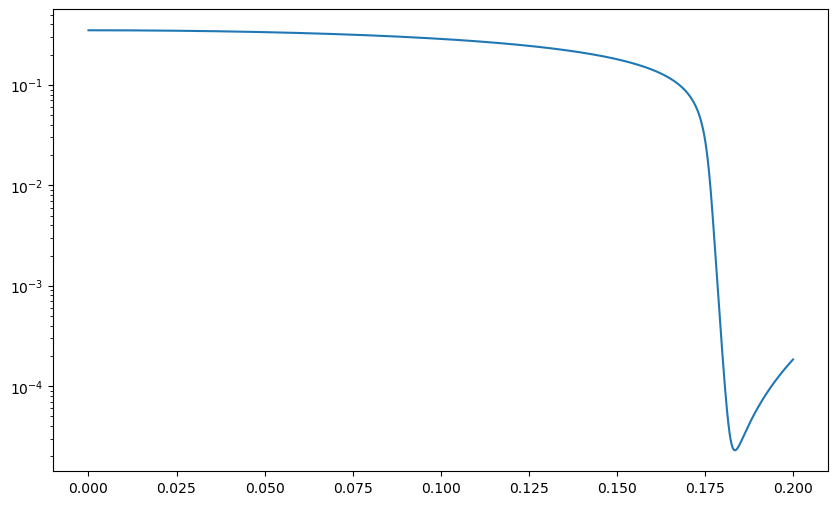

In [12]:
plt.figure(1,figsize=(10,6))

plt.plot(f(tlist),np.abs(E[0,:]-E[1,:]))

plt.yscale("log")

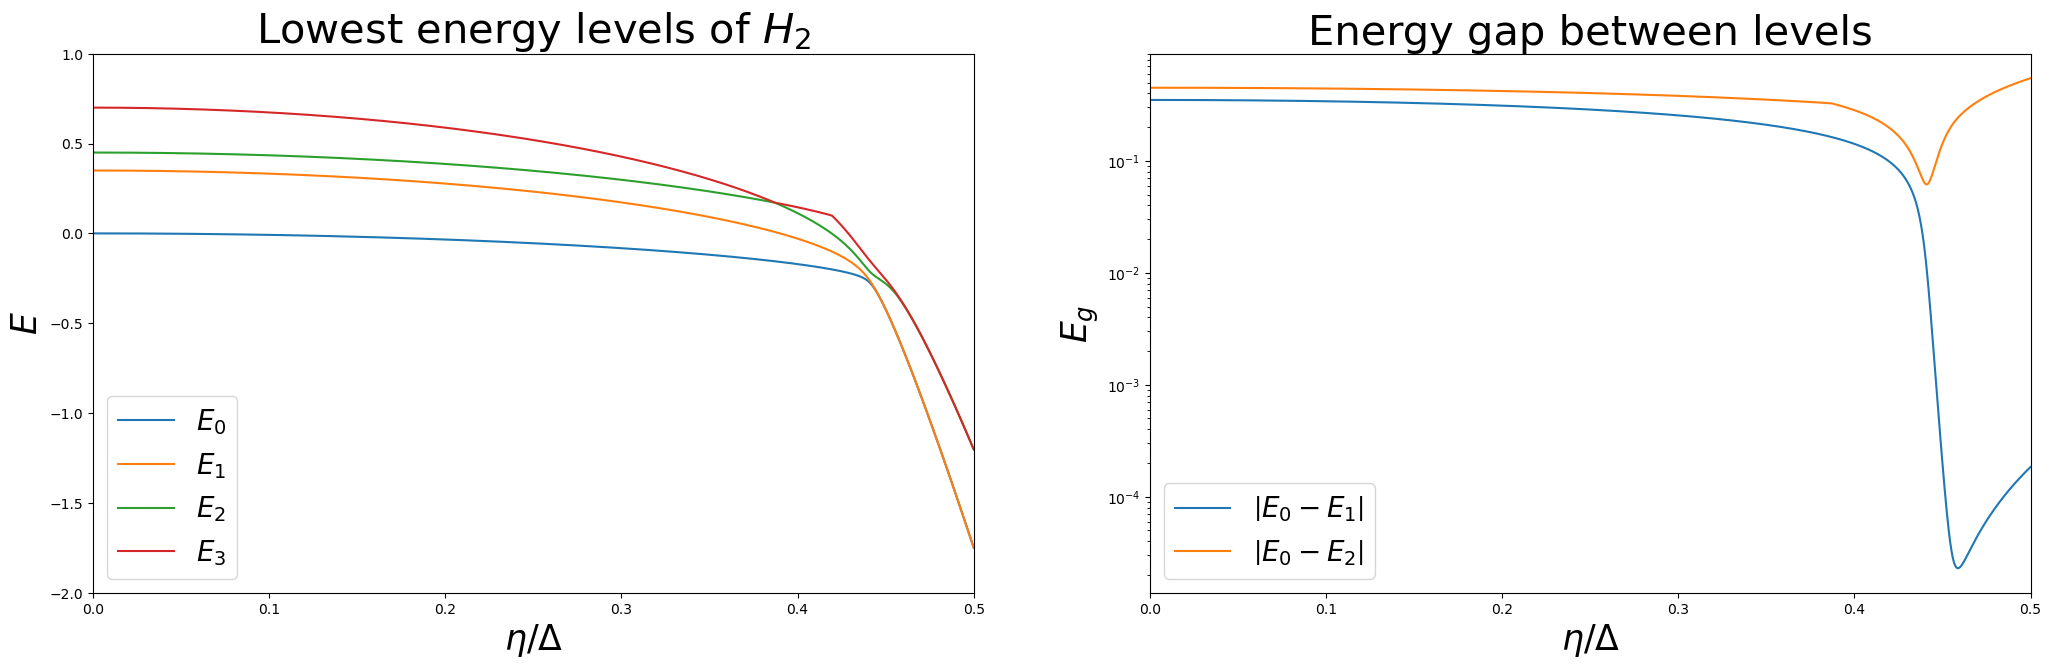

In [14]:
fig,ax=plt.subplots(1,2,figsize=(25,7))

ax[0].set_title(r"Lowest energy levels of $H_2$",fontsize=30)

ax[0].plot(f(tlist)/delta,E[0,:],label=r"$E_0$")
ax[0].plot(f(tlist)/delta,E[1,:],label=r"$E_1$")
ax[0].plot(f(tlist)/delta,E[2,:],label=r"$E_2$")
ax[0].plot(f(tlist)/delta,E[3,:],label=r"$E_3$")
ax[0].set_xlabel(r"$\eta/\Delta$",fontsize=25)
ax[0].set_ylabel(r"$E$",fontsize=25)

ax[0].set_xlim(f(0),0.20/delta)
ax[0].set_ylim(-2,1)

ax[0].legend(loc="lower left",fontsize=20)



ax[1].set_title(r"Energy gap between levels",fontsize=30)

ax[1].plot(f(tlist)/delta,np.abs(E[1,:]-E[0,:]),label=r"$\left |E_0-E_1\right|$")
ax[1].plot(f(tlist)/delta,np.abs(E[2,:]-E[0,:]),label=r"$\left |E_0-E_2\right|$")
ax[1].set_xlabel(r"$\eta/\Delta$",fontsize=25)
ax[1].set_ylabel(r"$E_g$",fontsize=25)
ax[1].set_yscale("log")
ax[1].legend(loc="lower left",fontsize=20)
ax[1].set_xlim(f(0),0.20/delta)

plt.savefig("niveles_de_energia_coupled_oscilador.png",format="png",bbox_inches="tight")